# CNN Prediction Notebook

You can use this notebook to make your own predictions. 
- Press 'shift+Enter' to run cells. 
- Run the first two cells to setup the model.
- Enter your directory path in cell 3. 
- Make your predictions in cell 4.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import load_model
from sklearn.metrics import multilabel_confusion_matrix, classification_report
import pickle
import warnings
warnings.simplefilter('ignore')
plt.style.use('seaborn-dark')
%matplotlib notebook

Using TensorFlow backend.


In [3]:
datadir='/home/mogmelon/Python/Projects/MelonID/'
classes=['watermelon', 'canteloupe', 'honeydew']
n_train                 = 2220
n_test                  = 500
epochs                  = 50
batch_size              = 16
img_width, img_height   = 150, 150

model = load_model(datadir+'model_3_20200210T1916.h5')
with open(datadir+'history_3_20200210T1916.pickle', 'rb') as f:
    history = pickle.load(f)
    
def predict_new_image(filepath):
    img = load_img(filepath, target_size=(img_width, img_height))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255      
    images = np.vstack([x])
    
    prediction = model.predict(images, batch_size=10)

    img = load_img(filepath)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255
    
    text=("What's my Melon? %s\nHow sure are you? %3.0f%%" % (classes[np.argmax(prediction[0])].capitalize(), np.max(prediction[0])*100))
    fig=plt.figure()
    plt.imshow(x[0])                           
    plt.axis('off')
    plt.title(text, loc='left')
    plt.show()
    return prediction

## Update 'filedir' to your directory:

In [4]:
filedir=datadir+'data/to_predict/'
#shift + Enter

## Make some predictions!

<IPython.core.display.Javascript object>


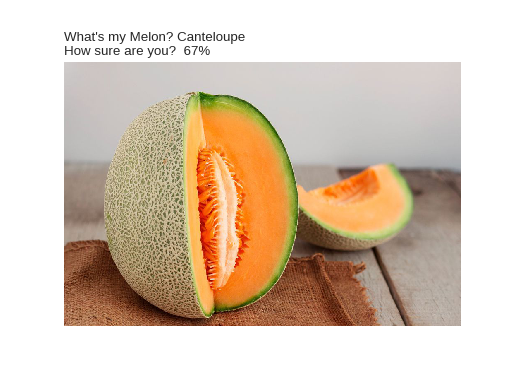

<IPython.core.display.Javascript object>


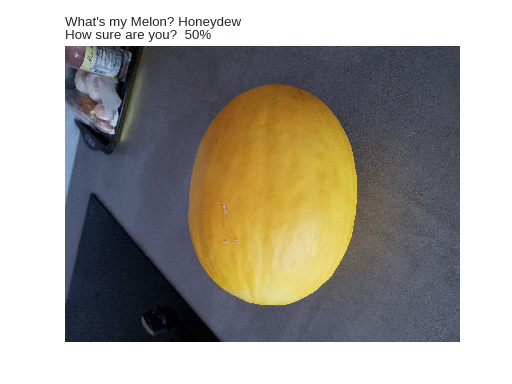

<IPython.core.display.Javascript object>


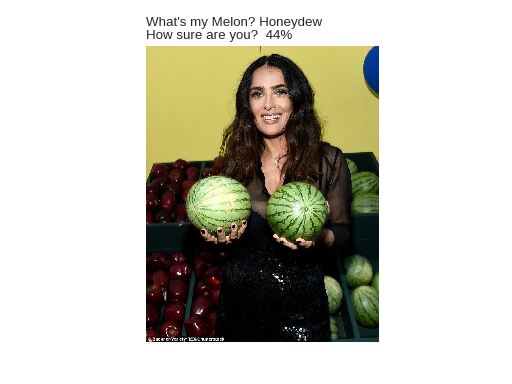

<IPython.core.display.Javascript object>


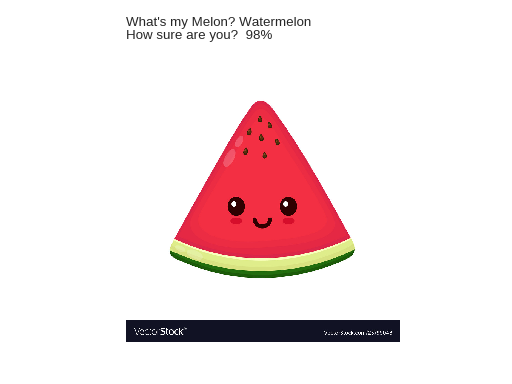

<IPython.core.display.Javascript object>


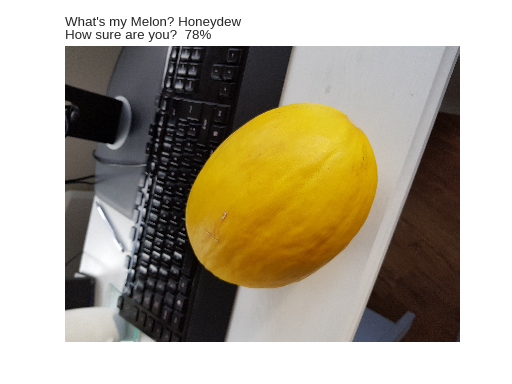

<IPython.core.display.Javascript object>


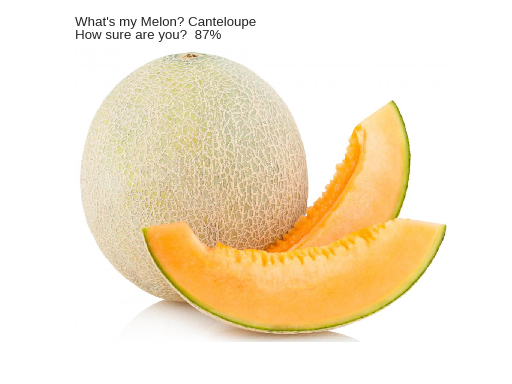

<IPython.core.display.Javascript object>


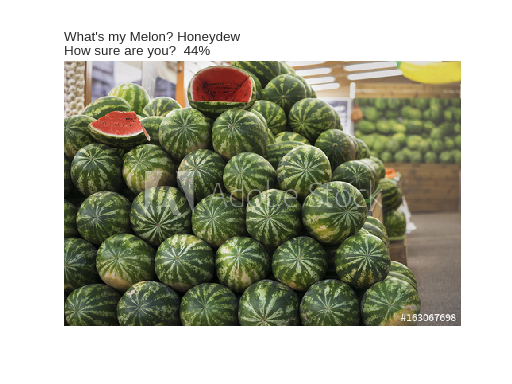

<IPython.core.display.Javascript object>


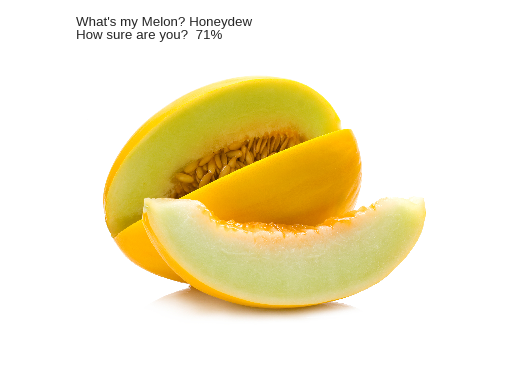

<IPython.core.display.Javascript object>


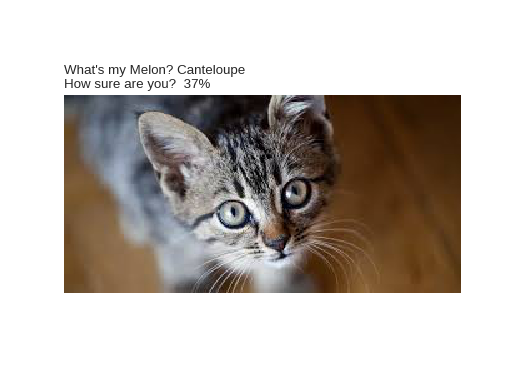

<IPython.core.display.Javascript object>


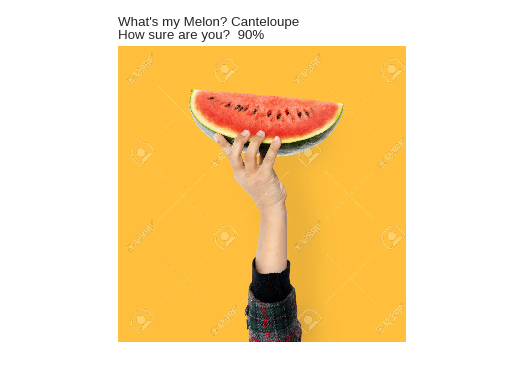

<IPython.core.display.Javascript object>


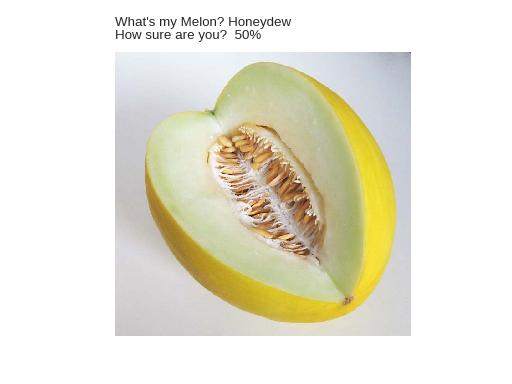

<IPython.core.display.Javascript object>


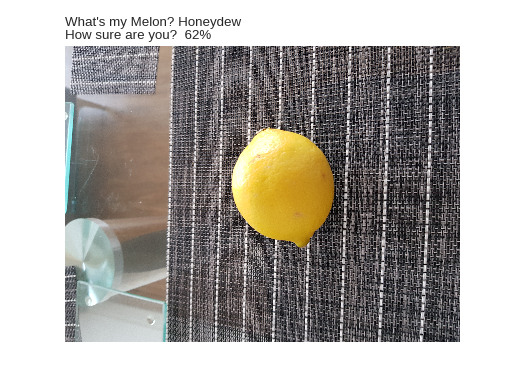

In [5]:
prediction=[]
for file in os.listdir(filedir):
    filepath=filedir+file
    prediction.append(predict_new_image(filepath))
#shift + Enter